# Logistic Regression using gradient Descent

In [683]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math


In [684]:
class LogisticRegression2:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight = None

    def train(self, X, Y):
        n_samples, n_features = X.shape
        X = np.hstack((np.ones((n_samples, 1)), X))
        self.weight = np.ones((n_features + 1,))

        for _ in range(self.epochs):
            z = np.dot(X, self.weight)
            y_hat = 1 / (1 + np.exp(-z))
            # minimum Error
            err = (1 / (n_samples)) * np.dot(Y - y_hat,X)

            # UPDATING THE WEIGHTS
            self.weight = self.weight + self.learning_rate * err
        return self.weight

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = np.dot(X, self.weight)
        sigmoid = 1 / (1 + np.exp(-z))
        Y_PRED = np.where(sigmoid >= 0.5, 1, 0)
        return Y_PRED

In [685]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10,
)

In [686]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [687]:
lgr = LogisticRegression2(0.5, 5000)
lgr.train(X_train, Y_train)

y_pred = lgr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [688]:
Y_test

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [689]:
accuracy_score(Y_test, y_pred)

1.0

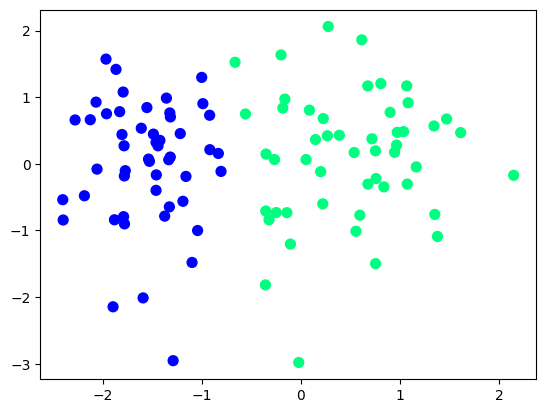

In [690]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=50)

In [691]:
lgr.weight

array([ 7.95223222, 10.88996578,  0.66502162])

In [692]:
slope = -(lgr.weight[1]/lgr.weight[2])
intercept = -(lgr.weight[0]/(lgr.weight[2]))

x_input = np.linspace(-3,3,100)
# x_input = X
y_output = slope*x_input+intercept

(-3.0, 3.0)

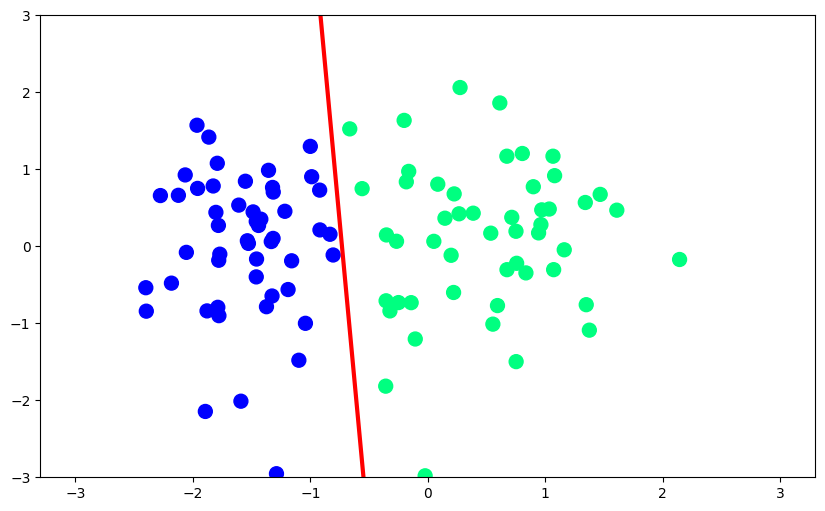

In [693]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_output,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,3)

In [694]:
lgr2 = LogisticRegression(penalty=None, solver='sag')
lgr2.fit(X_train, Y_train)
Y_pred = lgr2.predict(X_test)

C:\Users\harib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [695]:
accuracy_score(Y_test, Y_pred)

1.0

In [696]:
a = lgr2.coef_
b = lgr2.intercept_
a,b

(array([[11.58315403,  0.72638887]]), array([8.44672885]))

In [697]:
slope = -(a[:,0]/a[:,1])
intercept = -(b/a[:,1])

x_input = np.linspace(-3,3,100)
# x_input = X
y_output = slope*x_input+intercept

(-3.0, 3.0)

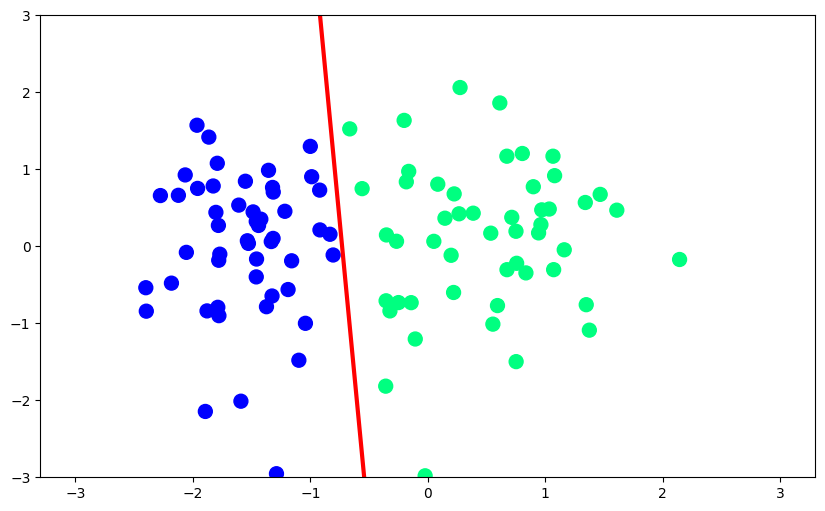

In [698]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_output,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,3)